---
authors:
  - name: Tom Siegl
---

# 11: Decision Trees

## Manual Model Evaluation

The following tasks require you to do the training and prediction of some models by hand.
So grab a piece of paper, your favorite notetaking app or simply a text editor and paint.
This concerns the tasks before the data generation part.

### Data

#### Training Data

| x1 | x2 | y  |
|----|----|----|
| 0  | 0  | -1 |
| 0  | 1  | -1 |
| 1  | 1  | -1 |
| 1  | 0  | 1  |

#### Test Data

| x1 | x2  | y  |
|----|-----|----|
| 0  | 0.1 | -1 |
| 1  | 0.1 | -1  |

:::{important} Tasks
1. Draw a scatter plot of the training data points.
2. Draw a scatter plot of the test data points.
:::

### Model

:::{important} Tasks
1. Describe a trained decision tree with depth $\leq 1$ based on the training set. (Draw the tree. Use the Gini split criterion with splits at the value `0.5` for each attribute.)
2. Predict the instances in the test set with that model.
3. BONUS: Draw the decision boundary of this model into the scatter plot of the data.
:::

:::{tip} Your answer
:class:dropdown
1. 
2. 
3. 
:::

## Example Data

Let's look at how such models behave when there is more data.
No need to work through all the tasks exclusively by hand from here on.

### Generate "Perfect" Data Points with Values in $[0, 1) \times [0, 1)$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X_raw = np.random.uniform(0, 1, (1000, 2))

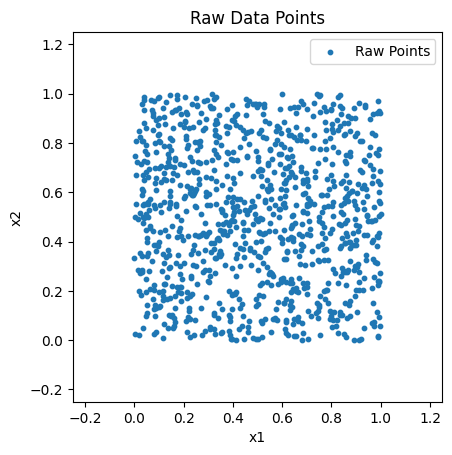

In [4]:
# plot
plt.scatter(X_raw[:, 0], X_raw[:, 1], s=10)
plt.title("Raw Data Points")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.gca().set_aspect("equal")
plt.legend(["Raw Points"])
plt.show()

### Add Ground Truth Class Labels from Underlying Separating Line

In [5]:
Y = np.array([np.sign(x2 - x1) if np.sign(x2 - x1) != 0 else 1 for x1, x2 in X_raw])

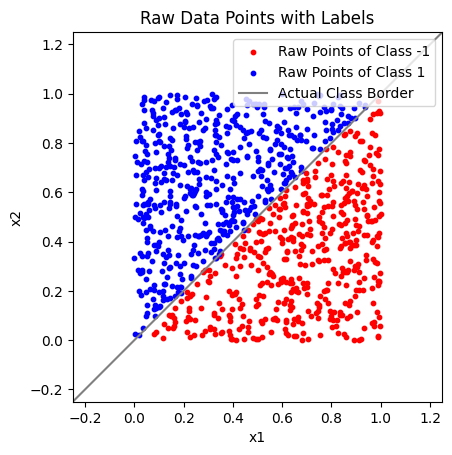

In [6]:
# plot
plt.scatter(X_raw[Y == -1][:, 0], X_raw[Y == -1][:, 1], s=10, c="Red")
plt.scatter(X_raw[Y == 1][:, 0], X_raw[Y == 1][:, 1], s=10, c="Blue")
plt.title("Raw Data Points with Labels")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.gca().set_aspect("equal")
plt.plot([-1, 2], [-1, 2], c="Gray")
plt.legend(["Raw Points of Class -1", "Raw Points of Class 1", "Actual Class Border"])
plt.show()

### Add Random Noise to the Data Points

In [7]:
X = X_raw + np.random.normal(0, 0.1, (1000, 2))

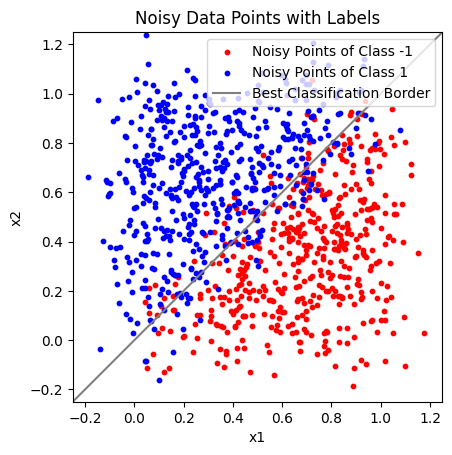

In [8]:
# plot
plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], s=10, c="Red")
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], s=10, c="Blue")
plt.title("Noisy Data Points with Labels")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.gca().set_aspect("equal")
plt.plot([-1, 2], [-1, 2], c="Gray")
plt.legend(["Noisy Points of Class -1", "Noisy Points of Class 1", "Best Classification Border"])
plt.show()

The "Best Classification Border" is the same line as the "Actual Class Border" before.
Because we added normally distributed noise to the data points, this is the theoretically optimal line to distinguish between class -1 and 1.

Note that even this model is not entirely free of errors.

## Decision Tree Classifier

You can see how a decision tree classifier behaves on the example data in the following plots.
Do not skip the second plot! Take a moment to think about what it shows.

Do not change the code yet.

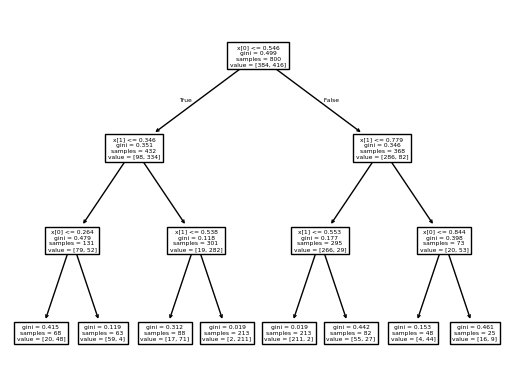

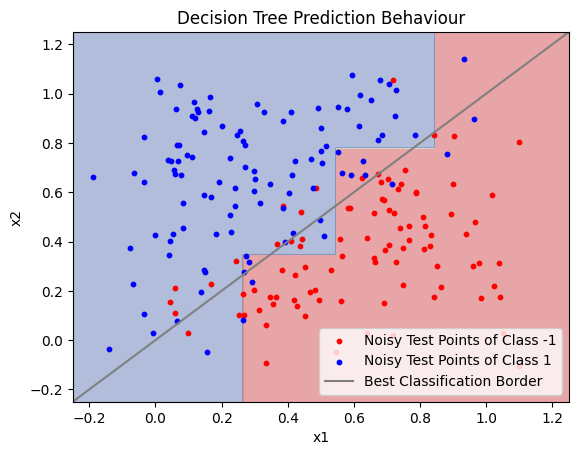

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# split data in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, Y_train)

dtree_y_pred = dtree.predict(X_train)

plot_tree(dtree)
plt.show()

# Plot the Prediction Behaviour of the Decision Tree
xx, yy = np.meshgrid(np.arange(-0.25, 1.25, 0.001),
                     np.arange(-0.25, 1.25, 0.001))
Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], s=10, c="Red")
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], s=10, c="Blue")
plt.plot([-1, 2], [-1, 2], c="Gray")
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.title('Decision Tree Prediction Behaviour')
plt.legend([
    "Noisy Test Points of Class -1",
    "Noisy Test Points of Class 1",
    "Best Classification Border"
])
plt.show()

In [10]:
from sklearn.metrics import zero_one_loss

dtree_y_pred_train = dtree.predict(X_train)
dtree_y_pred_test = dtree.predict(X_test)

print("Train loss:", zero_one_loss(Y_train, dtree_y_pred_train))
print("Test loss:", zero_one_loss(Y_test, dtree_y_pred_test))

Train loss: 0.10624999999999996
Test loss: 0.15000000000000002


### The `max_depth` Parameter

:::{important} Tasks
1. How would the drawn decision tree possibly change for different values of `max_depth`?
2. How would the decision boundary (second plot) change when you would reduce the `max_depth` parameter?
3. How would the decision boundary (second plot) change when you would increase the `max_depth`?
:::

:::{tip} Your answer
:class:dropdown
1. 
2. 
3. 
:::

Now temper with the code above to check your answers.

The second code cell shows the 0-1 loss of the decision tree model on the training and test data separately.

Make sure to run the whole notebook multiple times to get results on different data!
Especially in the tasks of the next section, it might be the case that your results are simply not positive by chance.

### Over- and Underfitting

:::{important} Tasks
**4.** Does your model currently overfit or underfit?

**5.** Change the model parameter(s) in order to make it overfit!

**6.** Change the model parameter(s) in order to make it underfit!
:::

:::{tip} Your answer
:class:dropdown
**4.** 

**5.** 

**6.** 
:::

### On the Leaf Level

:::{important} Tasks
1. For each leaf node in a decision tree with `max_depth=3` on our randomly generated example data, draw the boundary of the point set that falls into this leaf node similar to the decision boundary plots above. (A rough sketch based on a plot from the code above is enough.)
2. How do the point sets that fall into each leaf node combine into the overall decision boundary for classification?
3. Can the point sets that fall into two different leaf nodes overlap?
4. Can you similarly summarize the overall prediction behaviour of a decision tree for regression?
:::

:::{tip} Your answer
:class:dropdown
**2.** 

**3.** 

**4.** 
:::

## Random Forests

See how random forests hold up in a comprehensive current benchmark on tabular data called >>[TabArena](https://openreview.net/forum?id=jZqCqpCLdU)<< (Published 2025 at NeurIPS).

:::{important} Tasks
1. Is random forest training based on bagging or boosting?
2. Given a deterministic decision tree training algorithm, how does the random forest training manage to create multiple different decision trees from the same dataset?
:::

:::{tip} Your answer
:class:dropdown
1. 
2. 
:::